In [310]:
import pandas as pd
import pickle
import numpy as np
from numpy import sort

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score
from sklearn.utils import shuffle

import seaborn as sns
import matplotlib.pyplot as plt

import xgboost as xgb
import os

In [311]:
DATA_PATH = 'data'

# Load Data

In [368]:
def load_data(filename):
    df = pd.read_csv(os.path.join(DATA_PATH, filename))
    df = shuffle(df)
#     X = df[[
#         'TS',
#         'RC_RECENCY',
#         'TPV_6M',
#         'TPV_1M',
#         'FREQ_6M',
#         'FREQ_1M',
#         'COVER_DAY_6M',
#     ]]
    X = df.drop('RC_FLAG',axis=1)
    y = df[['RC_FLAG']]
    return X, y

In [369]:
X,y = load_data('NEW_RC_6M.csv')

In [314]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.20,
                                                    random_state=42)

In [315]:
print(X_train.shape)
print(X_test.shape)

(9556033, 7)
(2389009, 7)


In [316]:
y_train['RC_FLAG'].value_counts()

0    8157632
1    1398401
Name: RC_FLAG, dtype: int64

# Box plot

In [317]:
def remove_outlier(df, col_name):
    q3 = df[col_name].quantile(0.75)
    q1 = df[col_name].quantile(0.25)
    iqr = q3 - q1
    upper = q3 + 1.5 * iqr
    lower = q1 - 1.5 * iqr
    if lower < 0:
        lower = 0
    df = df[(df[col_name] >= lower) & (df[col_name] <= upper)]
    return df

In [318]:
df = pd.concat([X, y],axis=1)

In [319]:
temp_df = remove_outlier(df, 'TS')
temp_df[temp_df['RC_FLAG'] == 1].describe()

TS    RC_RECENCY        TPV_6M        TPV_1M       FREQ_6M  \
count  1.725124e+06  1.725124e+06  1.725124e+06  1.725124e+06  1.725124e+06   
mean   1.462369e+02  1.889876e+00  7.919433e+02  1.774176e+02  6.621281e+00   
std    5.054575e+01  5.212357e+00  5.059684e+02  7.905548e+01  9.847041e+00   
min    0.000000e+00  1.000000e+00  0.000000e+00  0.000000e+00  1.000000e+00   
25%    1.121500e+02  1.000000e+00  4.205700e+02  1.401900e+02  3.000000e+00   
50%    1.401900e+02  1.000000e+00  8.411400e+02  1.869200e+02  6.000000e+00   
75%    1.869200e+02  1.000000e+00  1.121520e+03  1.905867e+02  7.000000e+00   
max    3.144549e+02  4.000000e+01  4.269552e+04  1.423184e+04  1.555000e+03   

            FREQ_1M  COVER_DAY_6M    RC_FLAG  
count  1.725124e+06  1.725124e+06  1725124.0  
mean   1.489594e+00  1.390654e+02        1.0  
std    1.791850e+00  6.157233e+01        0.0  
min    1.000000e+00  1.000000e+00        1.0  
25%    1.000000e+00  9.000000e+01        1.0  
50%    1.000000e+00  1.550000e+02        1.0  
75%    1.333333e+00  1.800000e+02        1.0  
max    5.183333e+02  1.174600e+04        1.0

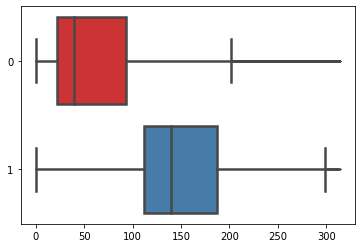

In [320]:
fig, ax = plt.subplots()
sns.boxplot(x='TS', y='RC_FLAG', hue='RC_FLAG', data=remove_outlier(df, 'TS'), palette='Set1', orient='h', fliersize=0.4,linewidth=2.5,dodge=False) \
    .set(
        xlabel='',
        ylabel=''
    )
ax.legend_.remove()

In [321]:
temp_df = remove_outlier(df, 'RC_RECENCY')
temp_df[temp_df['RC_FLAG'] == 1].describe()

TS    RC_RECENCY        TPV_6M        TPV_1M       FREQ_6M  \
count  1.748480e+06  1.748480e+06  1.748480e+06  1.748480e+06  1.748480e+06   
mean   1.519580e+02  1.921064e+00  8.206295e+02  1.842400e+02  6.604407e+00   
std    8.438506e+01  5.317501e+00  6.870589e+02  1.172457e+02  9.807725e+00   
min    0.000000e+00  1.000000e+00  0.000000e+00  0.000000e+00  1.000000e+00   
25%    1.121500e+02  1.000000e+00  4.205700e+02  1.401900e+02  3.000000e+00   
50%    1.401900e+02  1.000000e+00  8.411400e+02  1.869200e+02  6.000000e+00   
75%    1.869200e+02  1.000000e+00  1.121520e+03  1.927667e+02  7.000000e+00   
max    3.600000e+03  4.000000e+01  6.128170e+04  1.423184e+04  1.555000e+03   

            FREQ_1M  COVER_DAY_6M    RC_FLAG  
count  1.748480e+06  1.748480e+06  1748480.0  
mean   1.487384e+00  1.391096e+02        1.0  
std    1.783233e+00  6.218784e+01        0.0  
min    1.000000e+00  1.000000e+00        1.0  
25%    1.000000e+00  9.000000e+01        1.0  
50%    1.000000e+00  1.550000e+02        1.0  
75%    1.333333e+00  1.800000e+02        1.0  
max    5.183333e+02  1.174600e+04        1.0

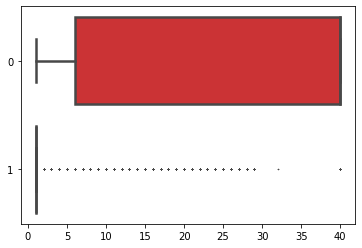

In [322]:
fig, ax = plt.subplots()
sns.boxplot(x='RC_RECENCY', y='RC_FLAG', hue='RC_FLAG', data=remove_outlier(df, 'RC_RECENCY'), palette='Set1', orient='h', fliersize=0.4,linewidth=2.5,dodge=False) \
    .set(
        xlabel='',
        ylabel=''
    )
ax.legend_.remove()

In [323]:
temp_df = remove_outlier(df, 'TPV_6M')
temp_df[temp_df['RC_FLAG'] == 0].describe()

TS    RC_RECENCY        TPV_6M        TPV_1M       FREQ_6M  \
count  9.210200e+06  9.210200e+06  9.210200e+06  9.210200e+06  9.210200e+06   
mean   7.446699e+01  2.663680e+01  4.460616e+02  1.436348e+02  9.607370e+00   
std    1.129706e+02  1.676121e+01  5.602601e+02  1.556292e+02  1.596990e+01   
min    0.000000e+00  1.000000e+00  0.000000e+00  0.000000e+00  1.000000e+00   
25%    2.003345e+01  6.000000e+00  5.000000e+01  3.466667e+01  1.000000e+00   
50%    3.947220e+01  4.000000e+01  1.869200e+02  1.100000e+02  3.000000e+00   
75%    9.346000e+01  4.000000e+01  6.405700e+02  1.889800e+02  1.000000e+01   
max    2.100000e+03  4.000000e+01  2.333200e+03  2.329390e+03  3.760000e+02   

            FREQ_1M  COVER_DAY_6M    RC_FLAG  
count  9.210200e+06  9.210200e+06  9210200.0  
mean   2.959636e+00  4.875611e+01        0.0  
std    3.665883e+00  5.128435e+01        0.0  
min    1.000000e+00  1.000000e+00        0.0  
25%    1.000000e+00  1.200000e+01        0.0  
50%    1.400000e+00  3.000000e+01        0.0  
75%    3.250000e+00  6.100000e+01        0.0  
max    1.600000e+02  1.380000e+03        0.0

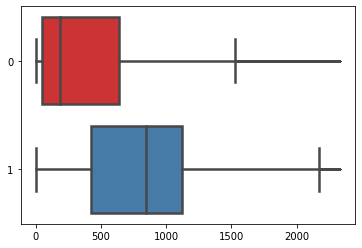

In [324]:
fig, ax = plt.subplots()
sns.boxplot(x='TPV_6M', y='RC_FLAG', hue='RC_FLAG', data=remove_outlier(df, 'TPV_6M'), palette='Set1', orient='h', fliersize=0.4,linewidth=2.5,dodge=False) \
    .set(
        xlabel='',
        ylabel=''
    )
ax.legend_.remove()

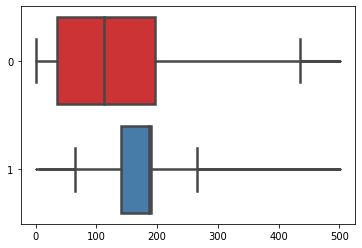

In [361]:
fig, ax = plt.subplots()
sns.boxplot(x='TPV_1M', y='RC_FLAG', hue='RC_FLAG', data=remove_outlier(df, 'TPV_1M'), palette='Set1', orient='h', fliersize=0.4,linewidth=2.5,dodge=False) \
    .set(
        xlabel='',
        ylabel=''
    )
ax.legend_.remove()

In [362]:
temp_df = remove_outlier(df, 'COVER_DAY_6M')
temp_df[temp_df['RC_FLAG'] == 1].describe()

TS    RC_RECENCY        TPV_6M        TPV_1M       FREQ_6M  \
count  1.728046e+06  1.728046e+06  1.728046e+06  1.728046e+06  1.728046e+06   
mean   1.518702e+02  1.919095e+00  8.008197e+02  1.813019e+02  6.320321e+00   
std    8.231593e+01  5.308846e+00  5.909436e+02  1.011579e+02  7.706524e+00   
min    0.000000e+00  1.000000e+00  0.000000e+00  0.000000e+00  1.000000e+00   
25%    1.121520e+02  1.000000e+00  4.205700e+02  1.401900e+02  3.000000e+00   
50%    1.401900e+02  1.000000e+00  8.411400e+02  1.869200e+02  6.000000e+00   
75%    1.869200e+02  1.000000e+00  1.121520e+03  1.912800e+02  6.000000e+00   
max    3.271030e+03  4.000000e+01  2.327221e+04  4.074236e+03  2.470000e+02   

            FREQ_1M  COVER_DAY_6M    RC_FLAG  
count  1.728046e+06  1.728046e+06  1728046.0  
mean   1.443037e+00  1.370494e+02        1.0  
std    1.430094e+00  5.826357e+01        0.0  
min    1.000000e+00  1.000000e+00        1.0  
25%    1.000000e+00  9.000000e+01        1.0  
50%    1.000000e+00  1.520000e+02        1.0  
75%    1.333333e+00  1.800000e+02        1.0  
max    5.600000e+01  2.610000e+02        1.0

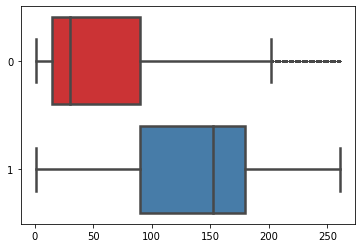

In [326]:
fig, ax = plt.subplots()
sns.boxplot(x='COVER_DAY_6M', y='RC_FLAG', hue='RC_FLAG', data=remove_outlier(df, 'COVER_DAY_6M'), palette='Set1', orient='h',fliersize=0.4,linewidth=2.5,dodge=False) \
    .set(
        xlabel='',
        ylabel=''
    )
ax.legend_.remove()

# Xgboost Model

In [327]:
model = xgb.XGBClassifier(importance_type='gain')
model.fit(X_train, y_train)

/opt/conda/envs/python36_prod/lib/python3.6/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/opt/conda/envs/python36_prod/lib/python3.6/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[18:30:24] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='approx', validate_parameters=1, verbosity=None)

In [328]:
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]
pred_prob = model.predict_proba(X_test)

In [329]:
acc = accuracy_score(y_test, predictions)
f1_acc = f1_score(y_test, predictions)

In [330]:
print('ACCURACY :', acc)
print('F1 SCORE :', f1_acc)

ACCURACY : 0.9508369369893541
F1 SCORE : 0.8403250299430504


In [331]:
importances = list(zip(model.feature_importances_, X_train))
importances.sort(reverse=True)
for item in importances:
    print(item[1], item[0])

RC_RECENCY 0.9571397
TPV_6M 0.019109802
COVER_DAY_6M 0.0074901744
TS 0.0065359115
TPV_1M 0.004230339
FREQ_1M 0.003350702
FREQ_6M 0.0021434014


# Confusion Matrix

In [332]:
from sklearn.metrics import plot_confusion_matrix, confusion_matrix

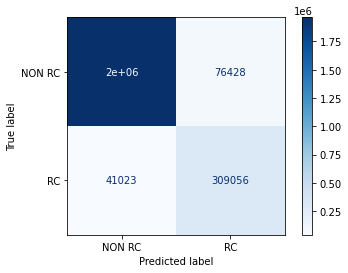

In [356]:
disp = plot_confusion_matrix(model, X_test, y_test,
                             display_labels=['NON RC', 'RC'],
                             cmap=plt.cm.Blues,)

In [334]:
confusion_matrix(y_test, y_pred)

array([[1962502,   76428],
       [  41023,  309056]])

In [335]:
disp.confusion_matrix

array([[1962502,   76428],
       [  41023,  309056]])

# ROC AUC

In [336]:
from sklearn.metrics import plot_roc_curve

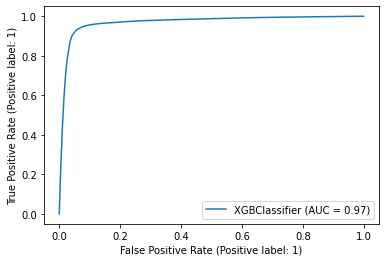

In [337]:
plot_roc_curve(model, X_test, y_test) 

# Lift Chart

In [338]:
import scikitplot as skplt

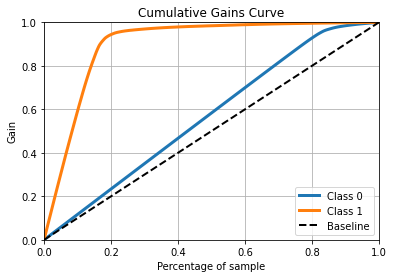

In [339]:
skplt.metrics.plot_cumulative_gain(y_test, pred_prob)
plt.show()

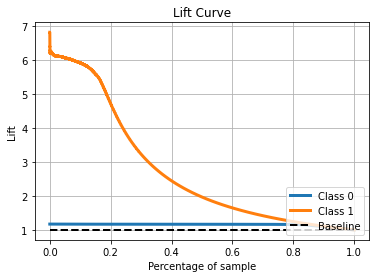

In [340]:
skplt.metrics.plot_lift_curve(y_test, pred_prob)
plt.show()

# Save model

In [341]:
model.save_model('model_result/vas_rc_unbalance.json')

# Evaluate

In [363]:
X_eval, y_eval = load_data('rc_test_jan21.csv')

In [364]:
X_eval.shape

(11092762, 7)

In [365]:
y_eval['RC_FLAG'].value_counts()

0    9051170
1    2041592
Name: RC_FLAG, dtype: int64

In [359]:
X_eval.shape

(11092762, 7)

In [346]:
bst = xgb.Booster({'nthread': 4})
bst.load_model('new_vas_rc_xgb.json')

In [347]:
pred = model.predict(X_eval)
predictions_eval = np.array([round(value) for value in pred])

In [348]:
acc = accuracy_score(y_eval, predictions_eval)
f1_acc = f1_score(y_eval, predictions_eval)

In [349]:
print('ACCURACY :', acc)
print('F1 SCORE :', f1_acc)

ACCURACY : 0.9249851389581784
F1 SCORE : 0.79859102157471


In [350]:
print(np.count_nonzero(predictions_eval == 0))
print(np.count_nonzero(predictions_eval == 1))

9002850
2089912


In [351]:
confusion_matrix(y_eval, predictions_eval)

array([[8610949,  440221],
       [ 391901, 1649691]])

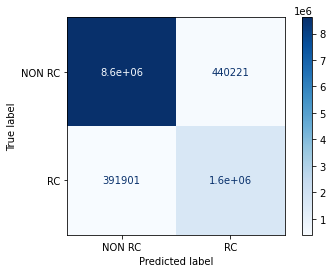

In [352]:
disp = plot_confusion_matrix(model, X_eval, y_eval,
                             display_labels=['NON RC', 'RC'],
                             cmap=plt.cm.Blues,)

In [353]:
disp.confusion_matrix

array([[8610949,  440221],
       [ 391901, 1649691]])

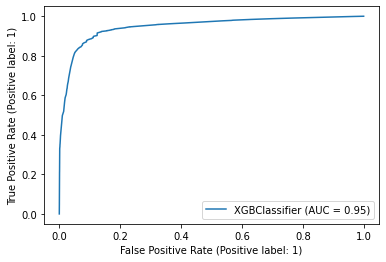

In [354]:
plot_roc_curve(model, X_eval, y_eval) 

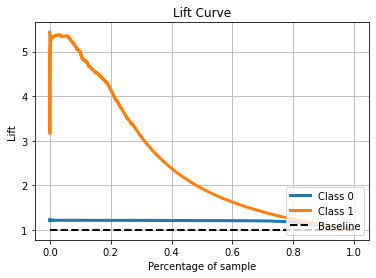

In [360]:
prob_result = model.predict_proba(X_eval)
skplt.metrics.plot_lift_curve(y_eval, prob_result)
plt.show()

# Prob predict

In [ ]:
prob_result = model.predict_proba(X_eval)
df_eval = pd.concat([X_eval, y_eval],axis=1)
df_eval['PROB'] = prob_result[:,1:]

In [ ]:
df_eval.head()

In [ ]:
df_eval.to_csv(os.path.join(DATA_PATH, 'rc_result.csv'))

# Feb Prediction

In [206]:
feb_df = pd.read_csv(os.path.join(DATA_PATH, 'feb_tmn_test.csv'))

In [207]:
data_df = feb_df[[
        'TS',
        'RC_RECENCY',
        'TPV_6M',
        'COVER_DAY_6M',
]]

In [208]:
bst = xgb.Booster({'nthread': 4})
bst.load_model('new_vas_rc_xgb.json')

In [209]:
prob_result = model.predict_proba(data_df)

In [210]:
feb_df['PROB'] = prob_result[:,1:]

In [179]:
feb_df.to_csv(os.path.join(DATA_PATH, 'rc_feb_result.csv'),index=False)